<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Social Media Data Analysis - Final Project</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Data Collection</h2>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Julia King</h4>
</div>
<br>

In [18]:
# setup chunk

import pandas as pd
import requests
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# 1. Using google trends, determine spikes in public interest concerning 15-minute cities.

In [47]:
# obtain NID cookie to avoid TooManyRequestsError & obtain suggestions

session = requests.Session()
session.get('https://trends.google.com')
cookies_map = session.cookies.get_dict()
nid_cookie = cookies_map['NID']

tr = TrendReq(hl = "en-GB", requests_args = {'headers': {'Cookie': f'NID={nid_cookie}'}}, retries = 5)
sugs = tr.suggestions("15-minute city")
sugs

[{'mid': '/g/11hk3_sx0c', 'title': '15-minute city', 'type': 'Topic'},
 {'mid': '/g/12bm1xq9d',
  'title': 'Lonely Planet Berlin',
  'type': 'Book by Andrea Schulte-Peevers'},
 {'mid': '/g/11vqrp46gt',
  'title': 'Good People Break Bad Laws: Civil Disobedience in the Modern Age',
  'type': 'Book by Topher Field'},
 {'mid': '/g/11f51x6b_s',
  'title': 'Private Vegas',
  'type': 'Book by James Patterson and Maxine Paetro'},
 {'mid': '/m/02_286', 'title': 'New York', 'type': 'City in New York State'}]

In [51]:
# extract the relevant query term

query_list = [sug["mid"] for sug in sugs if (sug["title"] == "15-minute city") and (sug["type"] == "Topic")]

query_list

['/g/11hk3_sx0c']

In [21]:
# build payload & obtain interest over time

# need to iterate through the list because the kw_list is longer than 5 keywords, which is not accepted by google trends. thus, requests are done in 2 batches of 5

def get_interest_over_time(trendreq_obj : TrendReq, kw_list : list, timeframe : str, geo : str) -> pd.DataFrame:
    """Given a trendreq object and search queries, returns the google trends interest over time.

    Args:
        trendreq_obj (TrendReq): TrendReq object, allows for preconfigured hl and request_args to avoid TooManyRequestsError
        kw_list (list): list of keywords to get trends for. Must be of length <= 5 due to google trends limit
        timeframe (str): Timeframe in the format "yyyy-mm-dd yyyy-mm-dd" identifying start and end of the timeframe
        geo (str): location code, ex US for USA and DE for Germany

    Returns:
        pd.DataFrame: Object returned by google trends
    """
    trendreq_obj.build_payload(kw_list = kw_list, timeframe = timeframe, geo = geo)
    return trendreq_obj.interest_over_time()

In [59]:
# get interest and save to csv
gtrends_df = get_interest_over_time(tr, kw_list = query_list, timeframe = "2020-01-01 2024-06-30", geo = "US") # kw_list is query term for 15 minute city (topic). Using topic instead of search term to cover variants
gtrends_df["date"] = gtrends_df.index
gtrends_df["volume"] = gtrends_df.iloc[:,0]
gtrends_df = gtrends_df[["date", "volume"]]

# save to csv
gtrends_df.to_csv("data/gtrends.csv", index = False)

In [60]:
gtrends_df

,date,volume
date,,
2019-12-29,2019-12-29,0
2020-01-05,2020-01-05,0
2020-01-12,2020-01-12,0
2020-01-19,2020-01-19,0
2020-01-26,2020-01-26,0
...,...,...
2024-06-02,2024-06-02,8
2024-06-09,2024-06-09,8
2024-06-16,2024-06-16,5


In [88]:
# load from csv 

gtrends_df = pd.read_csv("data/gtrends.csv")
gtrends_df['date'] = pd.to_datetime(gtrends_df["date"])

gtrends_df.head(3)

,date,volume
0,2019-12-29,0
1,2020-01-05,0
2,2020-01-12,0


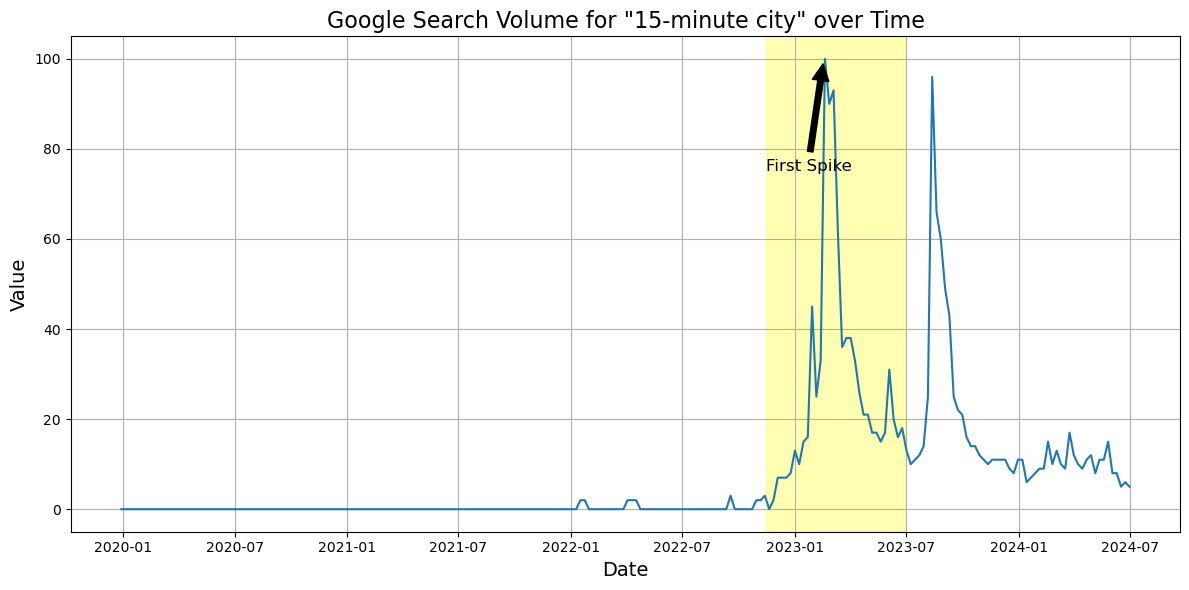

In [108]:
# create plot of google trends

fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(gtrends_df["date"], gtrends_df.iloc[:, 1])

# Highlight first spike
ax.axvspan(pd.to_datetime("2022-11-15"), pd.to_datetime("2023-07-01"), color = "yellow", alpha = 0.3)

# Adding annotations
ax.annotate("First Spike", xy = (pd.to_datetime("2023-02-17"), gtrends_df.iloc[:, 1].max()),
            xytext = (pd.to_datetime("2022-11-15"), gtrends_df.iloc[:, 1].max() - 25),
            arrowprops = dict(facecolor = "black", shrink = 0.05),
            fontsize = 12)

# Grid, legend, and layout adjustments
ax.set_title("Google Search Volume for \"15-minute city\" over Time", fontsize = 16)
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("Value", fontsize = 14)

ax.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# 2. For the relevant timeframe, obtain the IDs of the most-viewed videos related to 15-minute cities per week.

# 3. Obtain relevant metadata and comments for the videos.

# 4. Based on the title and description, classify the a sample of the videos as conspirative or non-conspirative by hand.

# 5. Employ supervised text analysis to classify the dataset as conspirative or non-conspirative. Evaluate the performance.

# 6. Use the emotion classification model LEIA to obtain the sentiments expressed in the comments.